### **Описание проекта**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. 

Наша задача — провести анализ и подготовить план действий по удержанию клиентов:
*   научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента
*   сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства
*   проанализировать основные признаки, наиболее сильно влияющие на отток
*   сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1.   выделить целевые группы клиентов;
2.   предложить меры по снижению оттока;
3.   определить другие особенности взаимодействия с клиентами.

### **Подготовка к работе**

Подключим гугл-диск

Я выполняю проект в гугл-колаб, поэтому сперва установим соединение с гугл-диском. Код закроем в try-except для исключения конфликта при ревью.

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  print('Подключение к google-drive не выполнено. Вы просматриваете проект в другой среде. Код запущен далее.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка библиотек для работы

In [ ]:
# colab часто выдаёт предупреждения - скроем их
import warnings
warnings.filterwarnings("ignore")
# загрузим библиотеки
# сперва основные для работы
import pandas as pd
# для "красоты" (графики и оформление)
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import seaborn as sns
# для математических и статистических операций
import numpy as np
# также загрузим os для создания двойного пути к базе данных
import os
#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Заранее настроим для себя кофмортный вывод данных pandas:

In [ ]:
# из всех возможностей настройки вывода данных pandas
# в текущем проекте сохраним лишь
# три знака после запятой у чисел с плавающей точкой
pd.set_option('display.float_format', '{:.3f}'.format)

Заранее зададим общий стиль своим графикам и диаграммам:

In [ ]:
large = 16; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
# на мой взгляд лучше всего подходит палитра deep
# она не пёстрая, относительно контрастная
# однако в реальном заказе я предпочёл бы принятые у заказчика цвета для подобной работы
sns.set_palette('deep') 
sns.set_style("whitegrid")

### **Ознакомление с данными и исследовательский анализ (EDA)**

*Проведите исследовательский анализ данных (EDA). Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe()). Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby()). Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Постройте матрицу корреляций и отобразите её.*

**Загрузка базы данных.** 

Используем двойной путь к базе данных (с моего гугл-диска и с хранилища практикума), чтобы исключить ошибку при ревью:

In [ ]:
pth1 = '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/ML/gym_churn.csv'
pth2 = '/datasets/gym_churn.csv'
if os.path.exists(pth1):
  df = pd.read_csv(pth1, delimiter=',')
elif os.path.exists(pth2):
  df = pd.read_csv(pth2, delimiter=',')
else:
  print('Проверьте правильность пути к датасету')

**Ознакомимся с данными:**

1.   посмотрим "шапку" таблицы и выпишем значения столбцов
2.   оценим объём датасета методом shape
3.   посмотрим общую информацию методом info
4.   проверим пропуски
5.   проверим дубликаты
6.   посмотрим разброс числовых данных методом describe

In [ ]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


Набор данных включает следующие поля:

*   'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные пользователя за предыдущий до проверки факта оттока месяц:
*   'gender' — пол
*   'Near_Location' — проживание или работа в районе, где находится фитнес-центр
*   'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
*   Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
*   'Phone' — наличие контактного телефона
*   'Age' — возраст
*   'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
*   'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
*   'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
*   'Group_visits' — факт посещения групповых занятий
*   'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
*   'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
*   'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон



In [ ]:
df.shape

(4000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**ИТОГО:**
*   пропусков в данных не найдено
*   полных дублей данных не найдено
*   названия колонок для упрощения работы лучше привести к стилистически правильному нижнему регистру
*   по типу данных будет рационально сменить колонку 'Month_to_end_contract' c float на int



In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df.dtypes

gender                                 int64
near_location                          int64
partner                                int64
promo_friends                          int64
phone                                  int64
contract_period                        int64
group_visits                           int64
age                                    int64
avg_additional_charges_total         float64
month_to_end_contract                  int64
lifetime                               int64
avg_class_frequency_total            float64
avg_class_frequency_current_month    float64
churn                                  int64
dtype: object

Изучим средние значения и стандартные отклонения

In [ ]:
# применем транспонирование для удобства оценки 
df.describe().T.head(14)

,count,mean,std,min,25%,50%,75%,max
gender,4000.000,0.510,0.500,0.000,0.000,1.000,1.000,1.000
near_location,4000.000,0.845,0.362,0.000,1.000,1.000,1.000,1.000
partner,4000.000,0.487,0.500,0.000,0.000,0.000,1.000,1.000
promo_friends,4000.000,0.308,0.462,0.000,0.000,0.000,1.000,1.000
phone,4000.000,0.903,0.295,0.000,1.000,1.000,1.000,1.000
contract_period,4000.000,4.681,4.550,1.000,1.000,1.000,6.000,12.000
group_visits,4000.000,0.412,0.492,0.000,0.000,0.000,1.000,1.000
age,4000.000,29.184,3.258,18.000,27.000,29.000,31.000,41.000
avg_additional_charges_total,4000.000,146.944,96.356,0.148,68.869,136.220,210.950,552.591
month_to_end_contract,4000.000,4.323,4.191,1.000,1.000,1.000,6.000,12.000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.





In [ ]:
churn_df_mean = pd.DataFrame(df.groupby(["churn"]).mean())
churn_df_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


**Построим гистограммы.**

Для бинарных показателей и показателей с относительно небольшим числом вариантов используем постройку гистограмм методом countplot библиотеки seaborn:

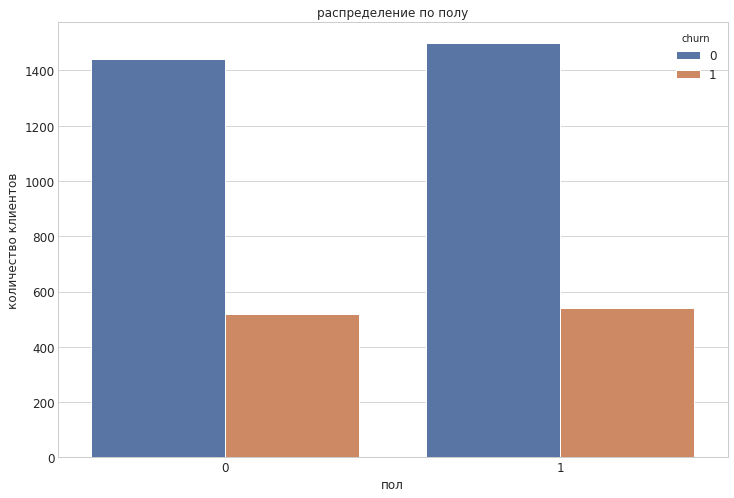

In [ ]:
sns.countplot(x="gender", hue="churn", data=df)
plt.title('распределение по полу')
plt.ylabel('количество клиентов')
plt.xlabel('пол')
plt.show()

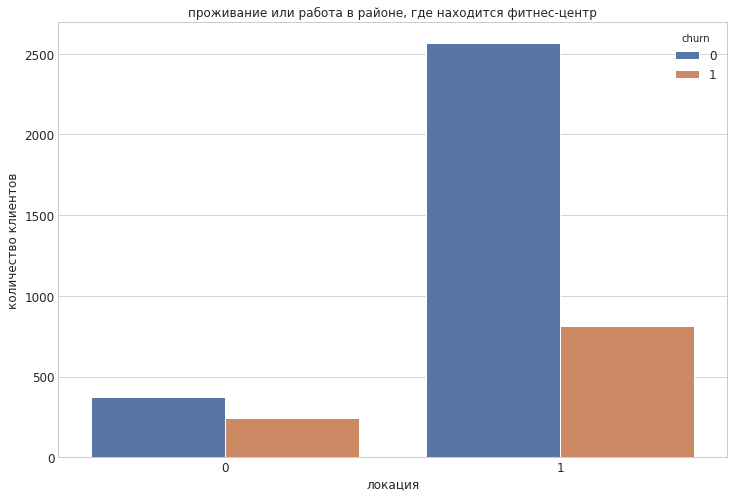

In [ ]:
sns.countplot(x="near_location", hue="churn", data=df)
plt.title('проживание или работа в районе, где находится фитнес-центр')
plt.ylabel('количество клиентов')
plt.xlabel('локация')
plt.show()

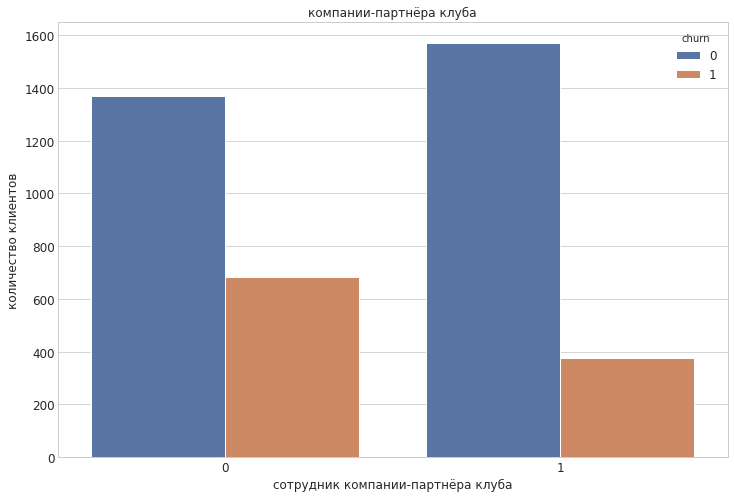

In [ ]:
sns.countplot(x="partner", hue="churn", data=df)
plt.title('компании-партнёра клуба')
plt.ylabel('количество клиентов')
plt.xlabel('сотрудник компании-партнёра клуба')
plt.show()

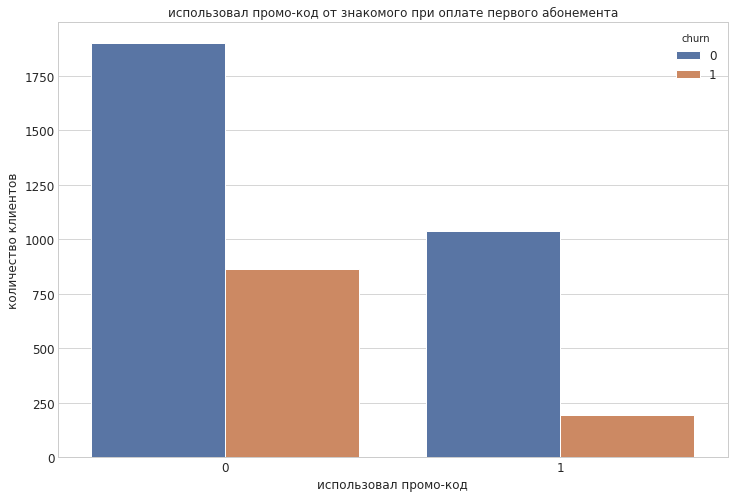

In [ ]:
sns.countplot(x="promo_friends", hue="churn", data=df)
plt.title('использовал промо-код от знакомого при оплате первого абонемента')
plt.ylabel('количество клиентов')
plt.xlabel('использовал промо-код')
plt.show()

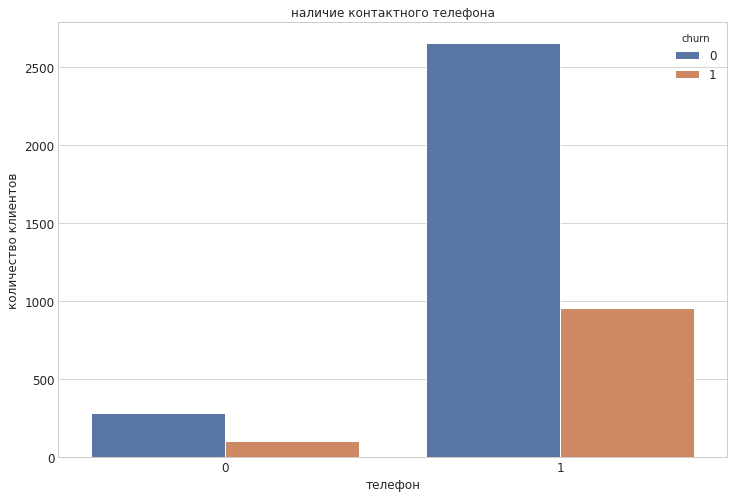

In [ ]:
sns.countplot(x="phone", hue="churn", data=df)
plt.title('наличие контактного телефона')
plt.ylabel('количество клиентов')
plt.xlabel('телефон')
plt.show()

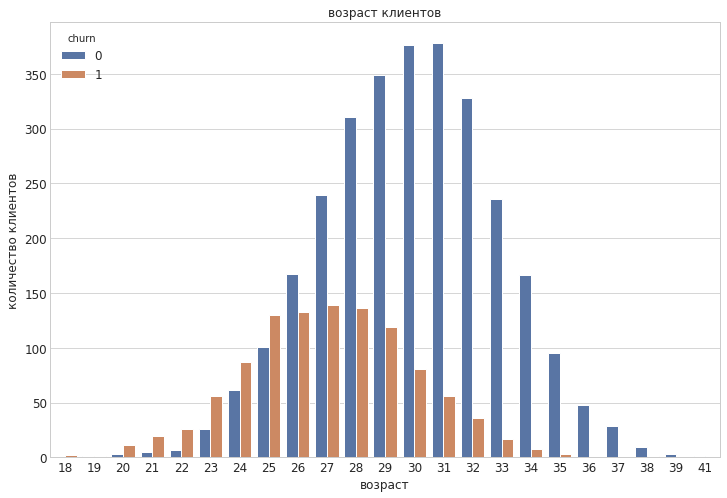

In [ ]:
sns.countplot(x="age", hue="churn", data=df)
plt.title('возраст клиентов')
plt.ylabel('количество клиентов')
plt.xlabel('возраст')
plt.show()

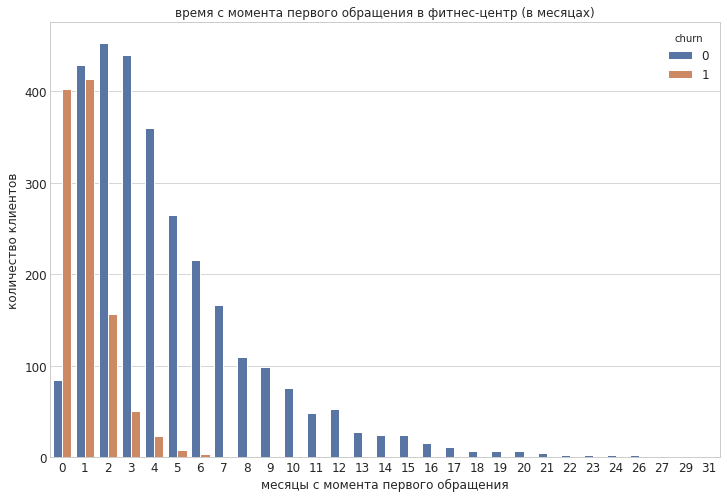

In [ ]:
sns.countplot(x="lifetime", hue="churn", data=df)
plt.title('время с момента первого обращения в фитнес-центр (в месяцах)')
plt.ylabel('количество клиентов')
plt.xlabel('месяцы с момента первого обращения')
plt.show()

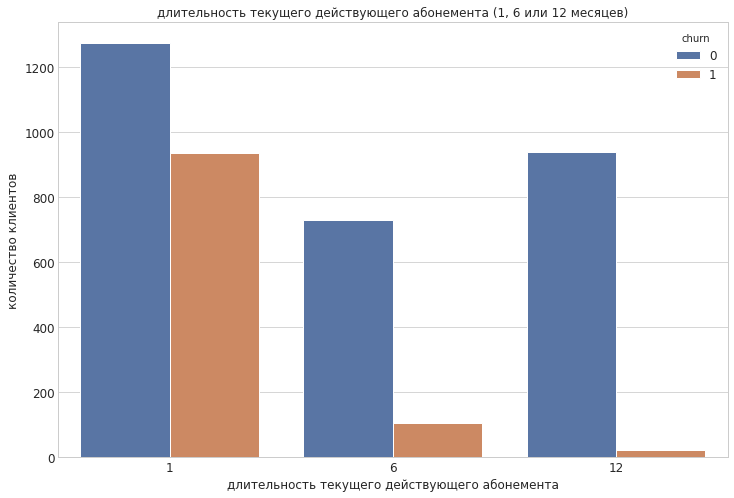

In [ ]:
sns.countplot(x="contract_period", hue="churn", data=df)
plt.title('длительность текущего действующего абонемента (1, 6 или 12 месяцев)')
plt.ylabel('количество клиентов')
plt.xlabel('длительность текущего действующего абонемента')
plt.show()

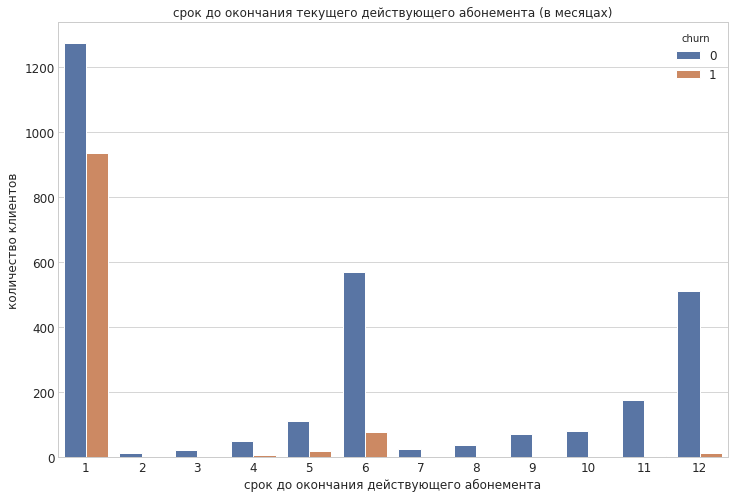

In [ ]:
sns.countplot(x="month_to_end_contract", hue="churn", data=df)
plt.title('срок до окончания текущего действующего абонемента (в месяцах)')
plt.ylabel('количество клиентов')
plt.xlabel('срок до окончания действующего абонемента')
plt.show()

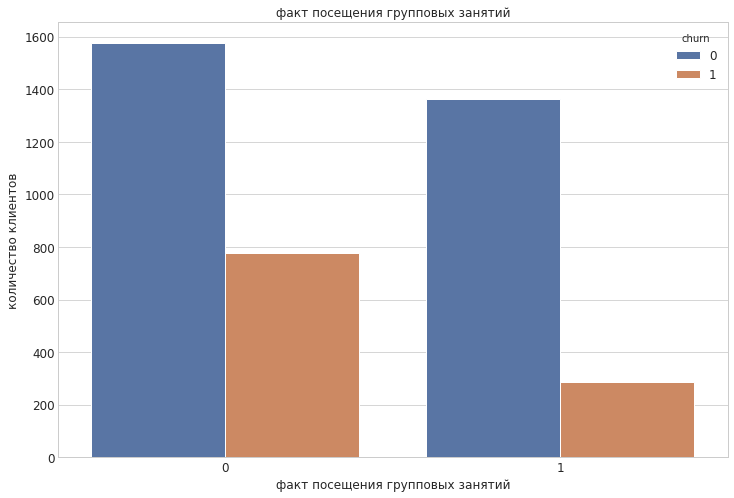

In [ ]:
sns.countplot(x="group_visits", hue="churn", data=df)
plt.title('факт посещения групповых занятий')
plt.ylabel('количество клиентов')
plt.xlabel('факт посещения групповых занятий')
plt.show()

Для прочих показателей возьмём их средние данные и построим обычные столбцатые гистограммы:

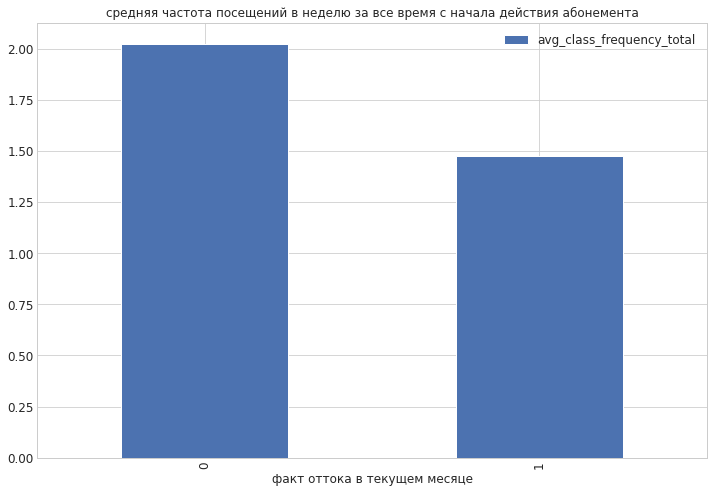

In [ ]:
df.pivot_table(index='churn', values='avg_class_frequency_total', aggfunc='mean').plot(kind='bar', title='средняя частота посещений в неделю за все время с начала действия абонемента')
plt.xlabel('факт оттока в текущем месяце')
plt.show()

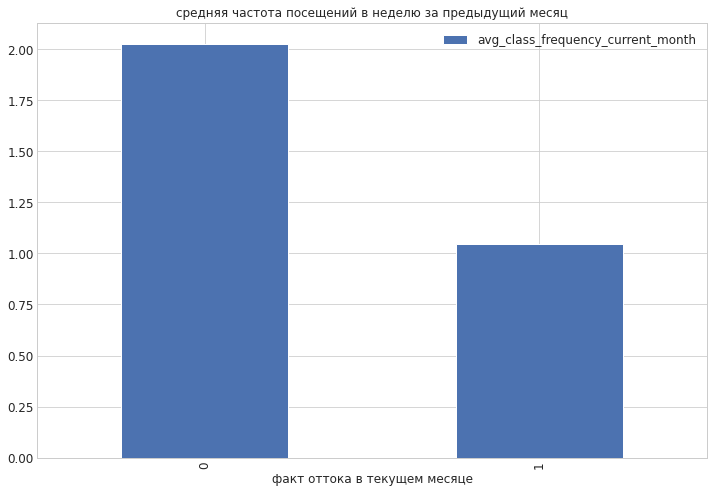

In [ ]:
df.pivot_table(index='churn', values='avg_class_frequency_current_month', aggfunc='mean').plot(kind='bar', title='средняя частота посещений в неделю за предыдущий месяц')
plt.xlabel('факт оттока в текущем месяце')
plt.show()

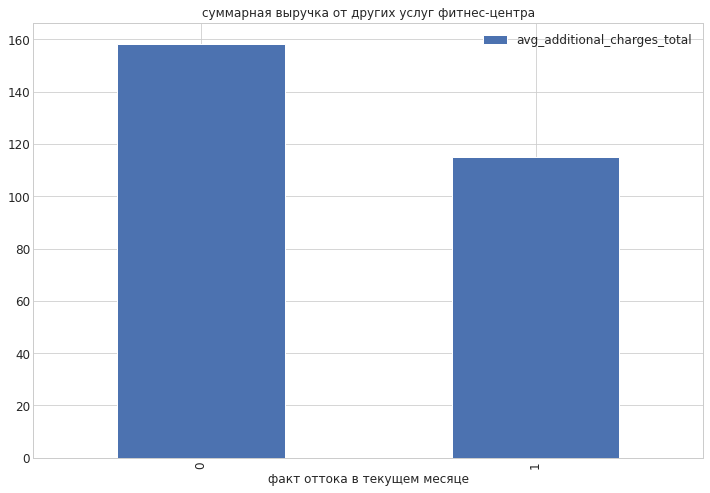

In [ ]:
df.pivot_table(index='churn', values='avg_additional_charges_total', aggfunc='mean').plot(kind='bar', title='суммарная выручка от других услуг фитнес-центра')
plt.xlabel('факт оттока в текущем месяце')
plt.show()

**Построим матрицу корреляций.**

Используем при этом тепловую карту, срезав при этом левую половину повторяющихся данных по диагонали единиц.

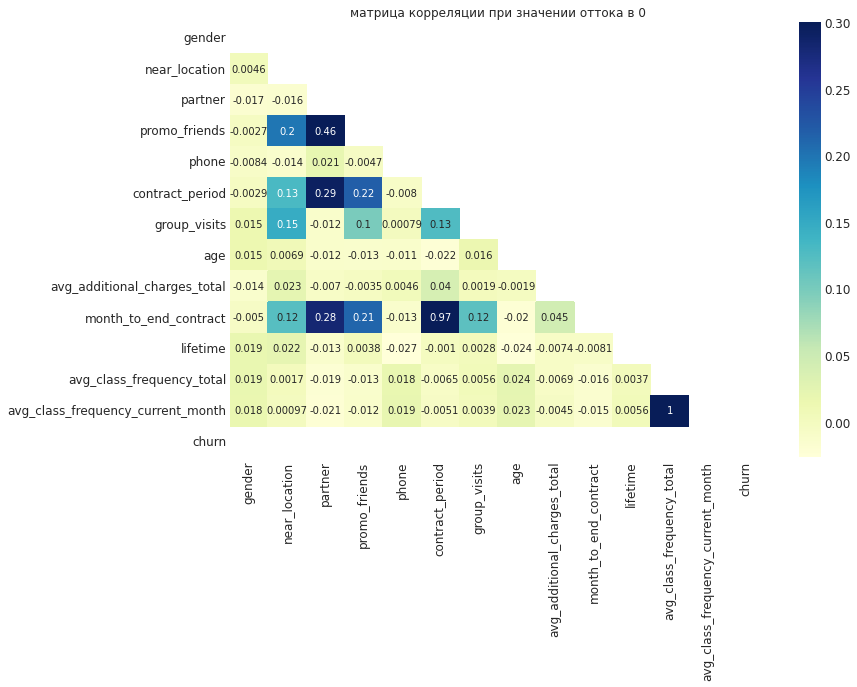

In [ ]:
churn_0 = pd.DataFrame(df.query('churn == 0'))
corr_0 = pd.DataFrame(churn_0.corr())
mask = np.zeros_like(corr_0)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr_0, mask=mask, annot=True, vmax=.3, cmap="YlGnBu")
plt.title('матрица корреляции при значении оттока в 0')
plt.show()

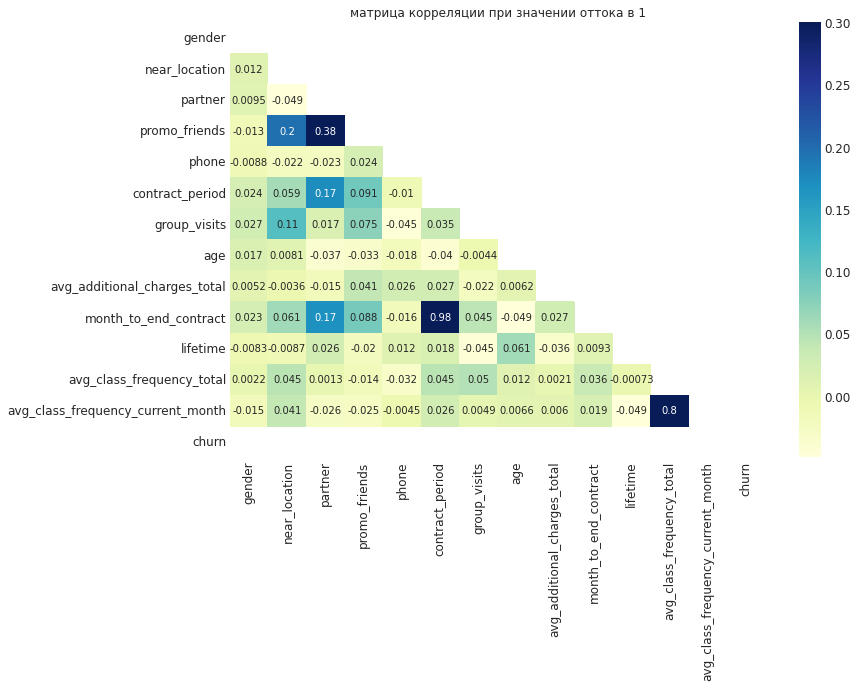

In [ ]:
churn_1 = pd.DataFrame(df.query('churn == 1'))
corr_1 = pd.DataFrame(churn_1.corr())
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr_1, mask=mask, annot=True, vmax=.3, cmap="YlGnBu")
plt.title('матрица корреляции при значении оттока в 1')
plt.show()

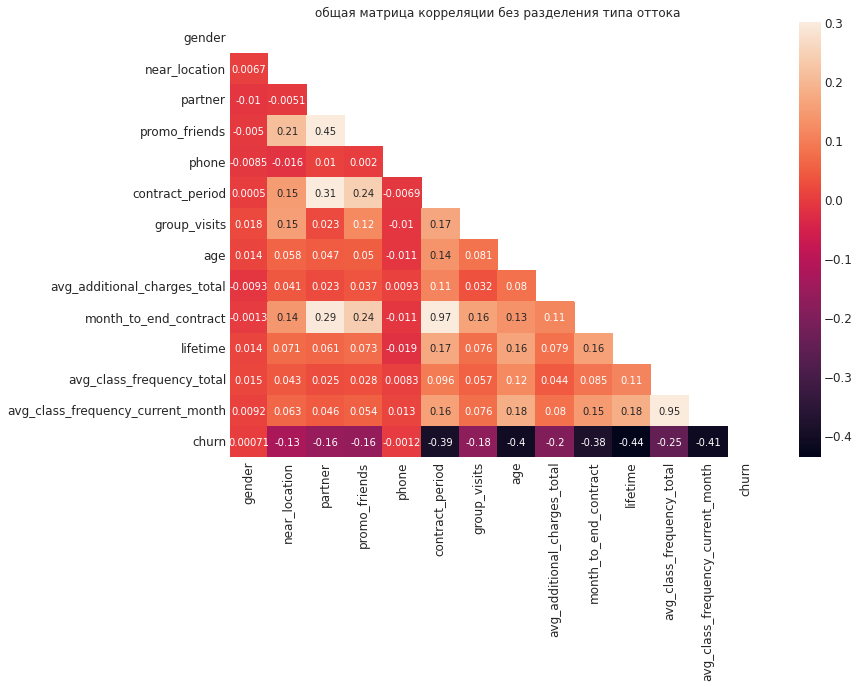

In [ ]:
corr = pd.DataFrame(df.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, mask=mask, annot=True, vmax=.3)
plt.title('общая матрица корреляции без разделения типа оттока')
plt.show()

По матрицам корреляции выявлена мультиколлинеарность (крайне высокая (обычно более [0,7]) степень корреляции между различными факторами) в парах:

*   'Avg_class_frequency_current_month' / 'Avg_class_frequency_total'
*   'Month_to_end_contract' / 'Contract_period'

Существует несколько способов решить эту проблему:

*   увеличить размер выборки
*   совместить схожие признаки в один признак
*   отбросить проблемную переменную
*   ограничить уравнение предсказания

Показатели с выявленной мультиколлинеарностью в случае средней частоты посещений, по сути, оценивают схожий показатель на разном отрезке времени; показатели же контракта в некоторой степени показывают один показатель "с разных сторон" - продолжительность или количество месяцев до окончания. Соответственно, в каждой паре мы можем убрать из анализа один из показателей. Учитывая, какие показатели на этапе кластеризации мы посчитали наиболее ценными в формировании профилей клиентских групп, мы можем удалить из данных первый признак в каждой паре.

N.T.: необходимо будет отметить изменения на этапе кластеризации.

In [ ]:
df = df.drop(['avg_class_frequency_current_month' ], axis = 1)
df = df.drop(['month_to_end_contract' ], axis = 1)
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227,3,0.020,0
1,0,1,0,0,1,12,1,31,113.203,7,1.923,0
2,0,1,1,0,1,1,0,28,129.448,2,1.859,0


### **Построим модели прогнозирования оттока клиентов**

*Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце. Разбейте данные на обучающую и валидационную выборку функцией train_test_split(). Обучите модель на train-выборке двумя способами:*

*   *логистической регрессией*
*   *случайным лесом*

*Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик? Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.*

**Построим модели бинарной классификации пользователей**

Целевой признак - факт оттока пользователя в следующем месяце.

Разобъем данные на обучающую и валидационную выборки функцией train_test_split()

Обучим модель на train-выборке логистической регрессией и случайным лесом

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 

Сравним модели. 

In [ ]:
X = df.drop(['churn'], axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('Коэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)

Метрики для модели логистической регрессии:
accuracy_score: 0.89875
precision_score: 0.7881773399014779
recall_score:0.8080808080808081

Метрики для модели случайного леса:
accuracy_score: 0.89
precision_score: 0.7864583333333334
recall_score:0.7626262626262627
Коэффициенты признаков в оптимальной функции логистической регрессии:
                         feature  coef
9                       lifetime 3.880
5                contract_period 1.317
7                            age 1.093
10     avg_class_frequency_total 0.730
8   avg_additional_charges_total 0.567
6                   group_visits 0.360
3                  promo_friends 0.218
4                          phone 0.120
1                  near_location 0.088
2                        partner 0.053
0                         gender 0.049


Доля правильных прогнозов выше в модели логистической регрессии, что делает её более пригодной для работы в сравнении со "случайным лесом".

### **Проведём кластеризацию клиентов**
*Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов). Стандартизируйте данные.Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта). Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить? Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним? Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?*

**Проведем кластеризацию клиентов без столбца целевого значения:**

*   Стандартизируем данные
*   Построим матрицу расстояний функцией linkage() и нарисуем дендограмму. 
*   Предположим, какое количество кластеров можем выделить.
*   Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов, взяв n=5 кластеров

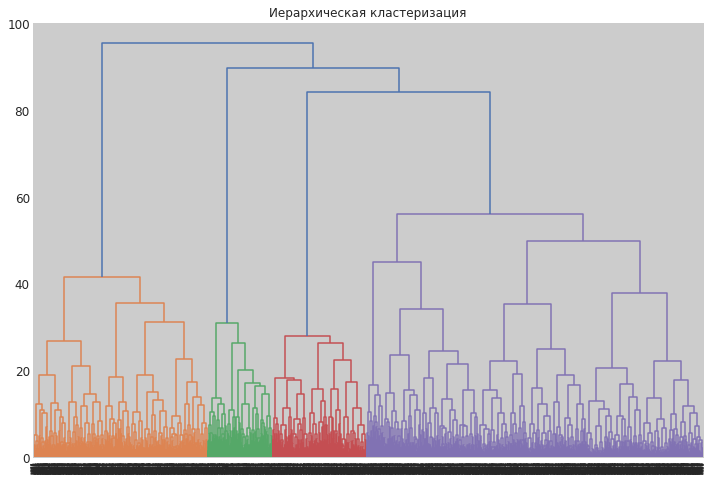

In [ ]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
df['cluster_km'] = labels

Дендрограмма наиболее чётко выделяет 4 кластера, но по поставленной задаче продолжим выделять 5 кластеров.

**Посмотрим на средние значения признаков для кластеров, оценив при этом отток:**

In [ ]:
cluster_df = pd.DataFrame(df.groupby('cluster_km').mean())
cluster_df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.499,0.000,0.488,0.077,1.000,3.032,0.235,28.722,137.540,3.061,1.770,0.399
1,0.489,0.995,0.955,0.892,1.000,7.661,0.458,29.544,155.861,4.381,1.979,0.121
2,0.505,1.000,0.239,0.059,1.000,2.820,0.000,28.770,143.384,3.344,1.801,0.382
3,0.544,1.000,0.250,0.079,1.000,4.528,1.000,29.536,148.089,3.761,1.941,0.201
4,0.523,0.863,0.472,0.306,0.000,4.777,0.427,29.298,144.208,3.940,1.854,0.267


<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
внесём правки в описание профиелей<br></div> 

**Описание кластеров:**
* **Кластер 0**
  * отток 0,399
  * проживание или работа вдали от клуба  
* **Кластер 1**
  * отток максимально стремится к 0 - 0,121
  * практически все клиенты проживают или работают рядом с клубом
  * большинство клиентов - сотрудники партнёров
  * большинство клиентов пришли по промо-акции
  * имеют самые продолжительные абонименты
  * принесли наибольшую выручку по прочим услугам центра
* **Кластер 2**
  * отток 0,382
  * клиенты живут или работают вблизи фитнес-центра
  * минимально привлечены по промо-акциям и минимально являются сотрудниками партнёров
  * минимальный средний срок заключаемого контракта 
  * абсолютно не посещают групповые занятия
* **Кластер 3**
  * отток 0,201
  * при этом клиенты имеют показатель проживания в районе клуба в 1 
  * все клиенты кластера посещают групповые занятиях
* **Кластер 4**
  * отток 0,267
  * не оставляют телефон

**Построим распределения признаков для кластеров**

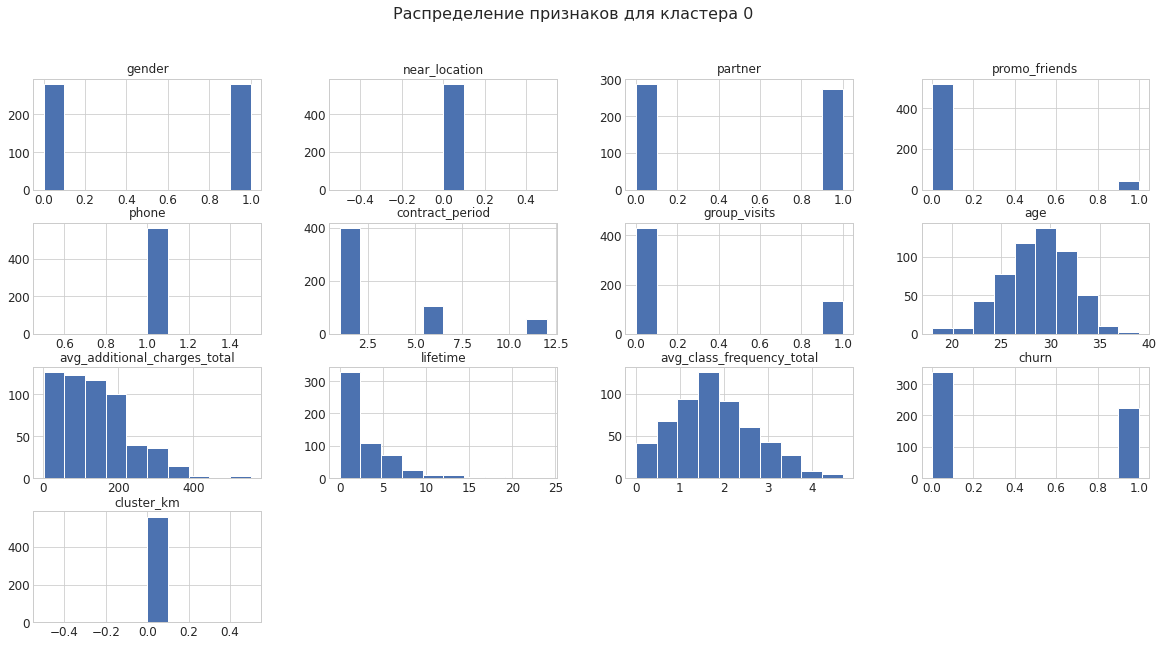

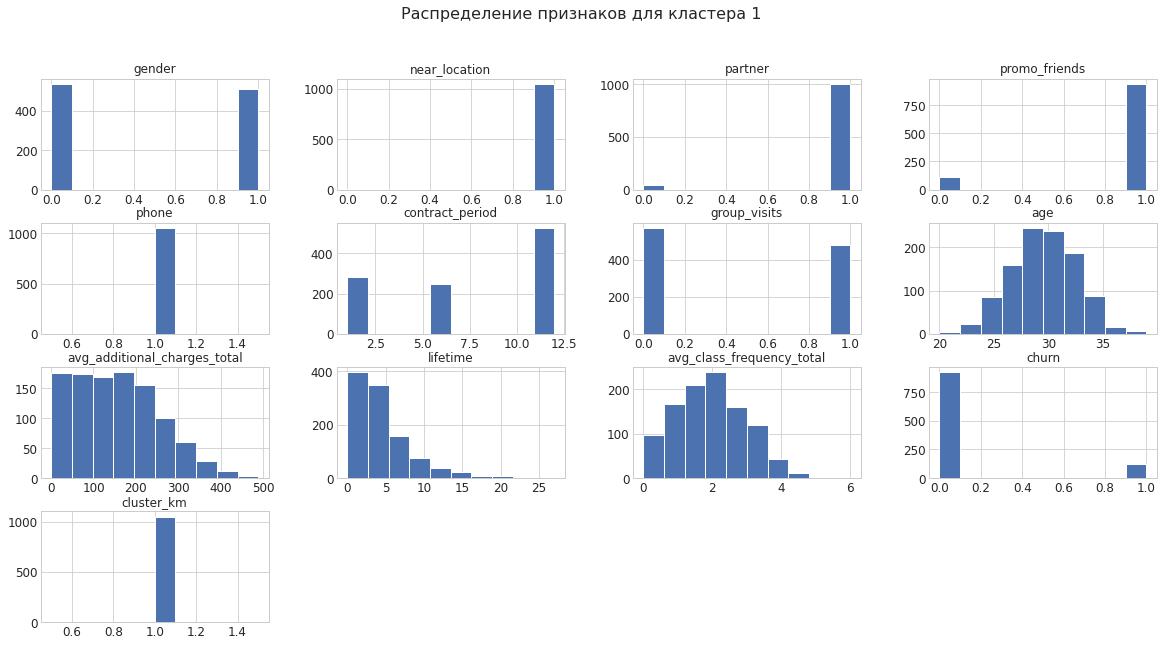

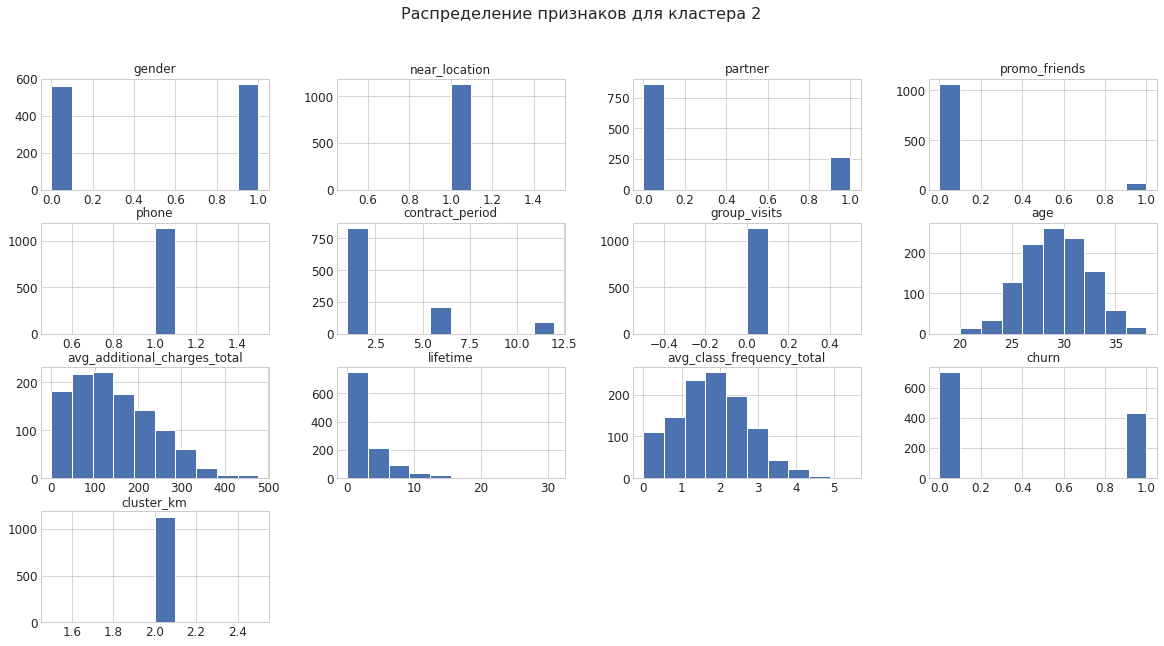

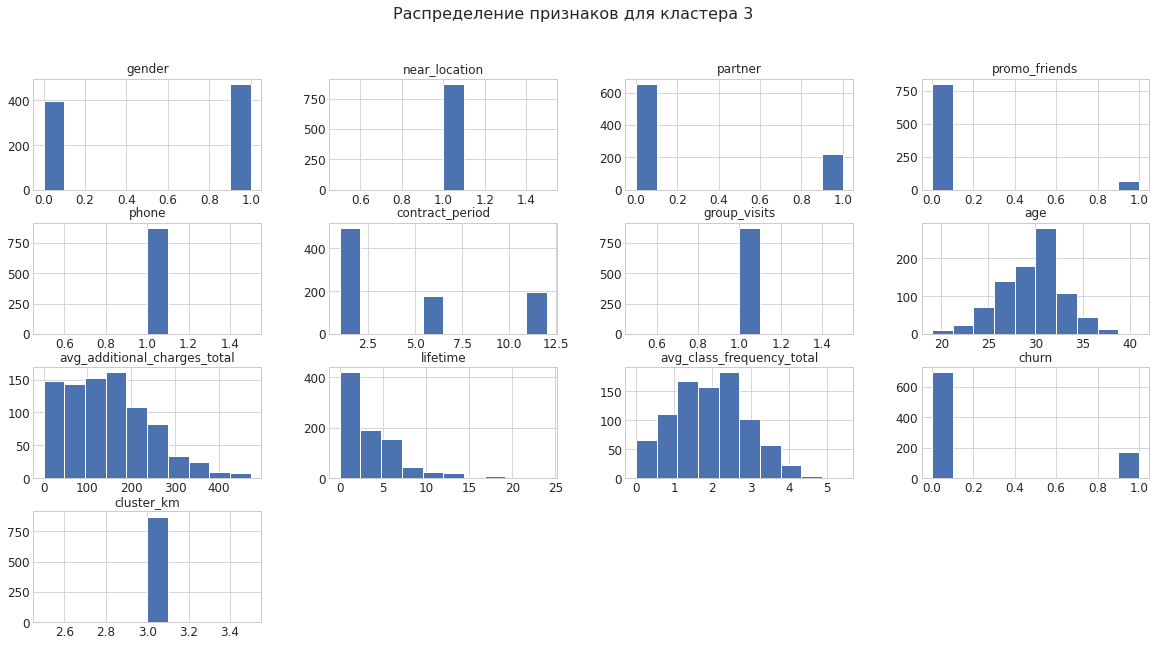

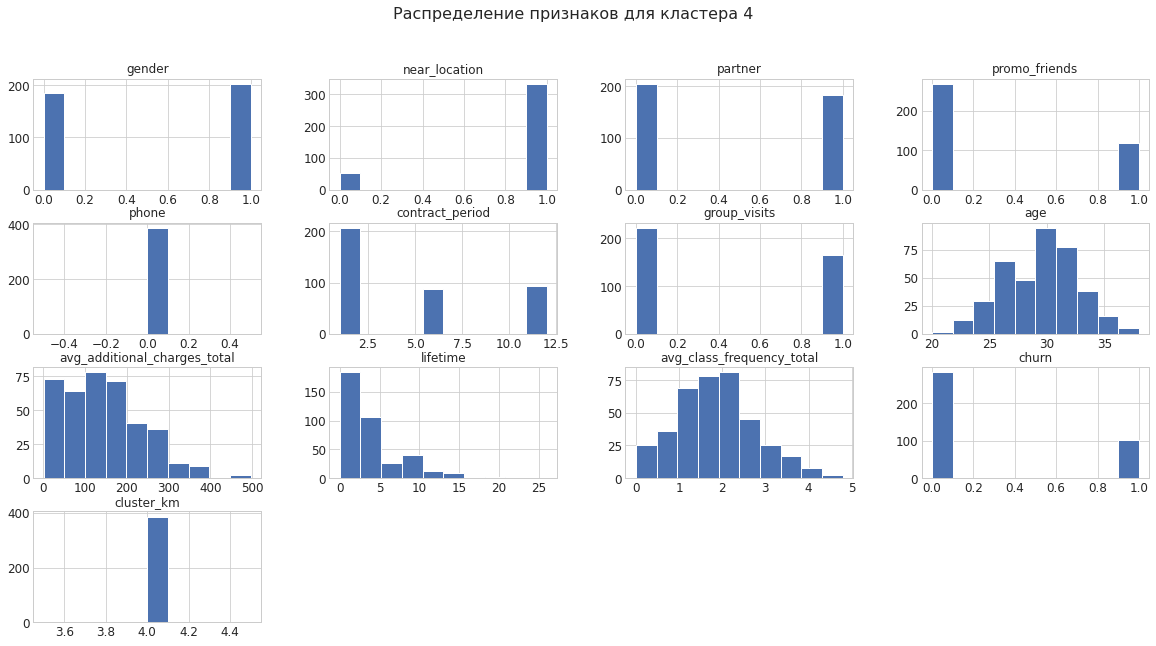

In [ ]:
for value in [0, 1, 2, 3, 4]:
  df[df['cluster_km']==value].hist(figsize=(20,10))
  plt.suptitle('Распределение признаков для кластера {}'.format(value))
  plt.show()

### **Выводы и базовые рекомендации по работе с клиентами**

Наиболее лояльны к услугам фитнес-центра сотрудники фирм-партнёров, особенно, пришедших по промоакциям.

Среди клиентов, проживающих или работающих вблизи клуба, отмечается диаметрально противоположная лояльность, в которой можно выделить выбор продолжительности абонимента: склонный к оттоку клиент предпочитает краткосрочные абонименты. 

Таким образом, можно вывести следующие базовые рекомендации:

*   упростить и сделать более привлекательным приобритение долгосрочных абониментов среди близко проживающих или работающих клиентов
*   повысить количество промо-акций и развивать деловые отношения с фирмами-партёрами

